In [3]:
from cumc import Box
import numpy as np
import pandas as pd

In [ ]:
box005 = Box(box_size=16, stop=200, dt=0.1, T=1, mass=200, d=0.05, bounded=False, n_test=1, order=2,offset_pos=True,offsets=(3.2,3.2,3.2))
box005.out_plot(suffix="of3_2", save_pdf=True)
pd.DataFrame({'pressure': box005.pressures, 'Ek': box005.Eks}).to_csv('data/box005_of3_2.csv', index=False)

In [ ]:
box01 = Box(box_size=16, stop=200, dt=0.1, T=1, mass=200, d=0.05, bounded=False, n_test=1, order=2,offset_pos=True,offsets=(3.2,3.2,3.2))
box01.out_plot(suffix="of3_2", save_pdf=True)
pd.DataFrame({'pressure': box01.pressures, 'Ek': box01.Eks}).to_csv('data/box01_of3_2.csv', index=False)

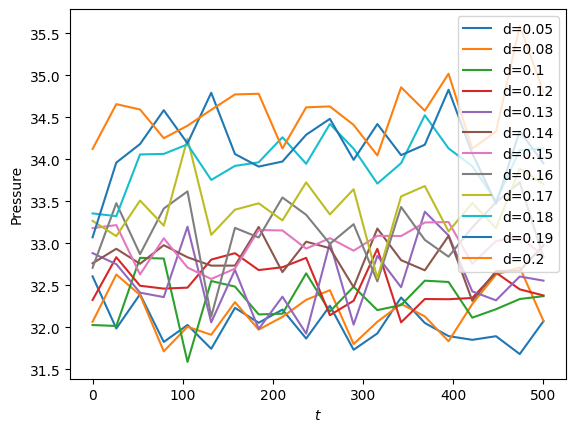

In [31]:
from matplotlib import pyplot as plt

filenames = [
    'data/box005_of3_2.csv',
    'data/box008_of3_2.csv',
    'data/box01_of3_2.csv',
    'data/box012_of3_2.csv',
    'data/box013_of3_2.csv',
    'data/box014_of3_2.csv',
    'data/box015_of3_2.csv',
    'data/box016_of3_2.csv',
    'data/box017_of3_2.csv',
    'data/box018_of3_2.csv',
    'data/box019_of3_2.csv',
    'data/box02_of3_2.csv',
]
pressures = []
for f in filenames:
    df = pd.read_csv(f)
    meaning = 100
    Ps = []
    for i in range(0, len(df['pressure']), meaning):
        Ps.append(sum(df['pressure'][i:i+meaning]) / meaning)
    Ts = np.linspace(0, 500, len(Ps))
    plt.plot(Ts, Ps, label='d=0.'+f.split('/')[1].split('_')[0][4:])
plt.xlabel('$t$')
plt.ylabel('Pressure')
plt.legend()

Text(0, 0.5, 'Pressure')

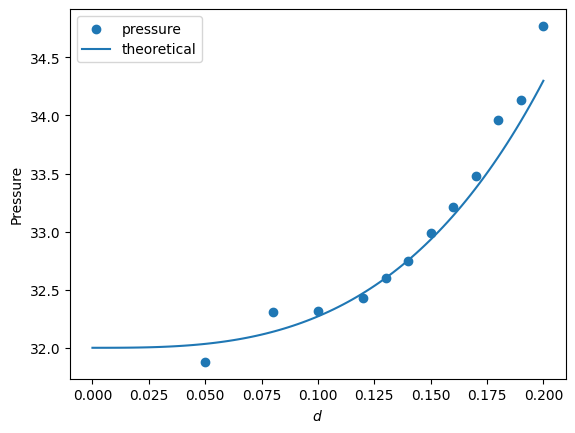

In [41]:
Ps = []
ds = []
for f in filenames:
    df = pd.read_csv(f)
    Ps.append(sum(df['pressure'][-500:]) / 500)
    ds.append(float('0.'+f.split('/')[1].split('_')[0][4:]))
plt.scatter(ds, Ps, label='pressure')
dss = np.linspace(0, max(ds), 100)
num_particles = 131072
T = 1
box_size = 16
plt.plot(dss, num_particles * T / (box_size ** 3 - num_particles * 2/3*np.pi*dss**3/8), label='theoretical')
plt.legend()
plt.xlabel('$d$')
plt.ylabel('Pressure')

Text(0, 0.5, 'Pressure')

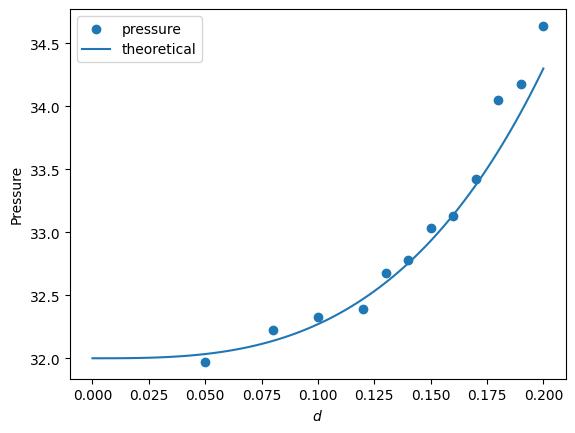

In [37]:
Ps = []
ds = []
for f in filenames:
    df = pd.read_csv(f)
    Ps.append(sum(df['pressure'][-1000:]) / 1000)
    ds.append(float('0.'+f.split('/')[1].split('_')[0][4:]))
plt.scatter(ds, Ps, label='pressure')
dss = np.linspace(0, max(ds), 100)
num_particles = 131072
T = 1
box_size = 16
plt.plot(dss, num_particles * T / (box_size ** 3 - num_particles * 2/3*np.pi*dss**3/8), label='theoretical')
plt.legend()
plt.xlabel('$d$')
plt.ylabel('Pressure')

In [35]:
df['pressure'].shape

(2000,)